In [128]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

# Introduction
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# 1. About Dataset

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
1. Date - The specific calendar date for the bike rental record (Day-Month-Year)
2. Rented Bike count - The number of bikes rented during a specific time interval (Target Variable)
3. Hour - Hour of the day
4. Temperature - The temperature in Celsius at the time of the bike rental
5. Humidity - The relative humidity percentage at the time of the bike rental (%)
6. Windspeed - The speed of the wind in meters per second at the time of the bike rental (m/s)
7. Visibility - The visibility in meters at the time of the bike rental (10m)
8. Dew point temperature - The temperature at which air becomes saturated and dew forms at the time of the bike rental (Celsius)
9. Solar radiation - The amount of solar radiation in mega-joules per square meter at the time of the bike rental (MJ/m2)
10. Rainfall - The amount of rainfall in millimeters at the time of the bike rental (mm)
11. Snowfall - The amount of snowfall in centimeters at the time of the bike rental (cm)
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - A categorical variable indicating whether the day of the bike rental record is a holiday or not. It has two possible values: "Holiday" and "No Holiday". The "Holiday" value represents a day that is recognized as a holiday, while the "No Holiday" value represents a regular day that is not a designated holiday.
14. Functional Day - A categorical variable indicating whether the bike rental service was functioning on the day of the record. It has two possible values: "Yes" and "No". The "Yes" value indicates that the bike rental service was operational and functioning normally on that day. Conversely, the "No" value indicates that the bike rental service was not operating, potentially due to maintenance, strikes, or other reasons.

### 1.1 Dataset Loading

In [156]:
url = 'https://raw.githubusercontent.com/Nayaeun/Bike-Sharing-Prediction/main/Data/SeoulBikeData.csv'
df = pd.read_csv(url, encoding= 'unicode_escape')

### 1.2 Dataset Check

In [130]:
df.info()
df.head(4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes

In [131]:
print (df.shape)
df.nunique()

(8760, 14)


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#### Observation:
* The dataset contains 8760 rows and 14 columns.
* There are 6 columns of datatype float64, 4 columns of datatype int64 and 4 columns of datatype object.
* There are no missing and duplicate values in the dataset.
* The dataset contains bike rental data of 1 year.
* Input features: Date, Hour, Temp, Humid, WindSpeed, Visibility, DewPTemp, SolarRad, Rainfall, Snowfall, Season, Holiday, Functioning
* Target feature: **Rented Bike Count**

# 2. About Features

In [132]:
# Statistical summary of the dataset
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [133]:
# Check Unique Values for each variable
for i in df.columns.to_list():
  print('Number of unique values in', i, 'is', df[i].nunique())

Number of unique values in Date is 365
Number of unique values in Rented Bike Count is 2166
Number of unique values in Hour is 24
Number of unique values in Temperature(°C) is 546
Number of unique values in Humidity(%) is 90
Number of unique values in Wind speed (m/s) is 65
Number of unique values in Visibility (10m) is 1789
Number of unique values in Dew point temperature(°C) is 556
Number of unique values in Solar Radiation (MJ/m2) is 345
Number of unique values in Rainfall(mm) is 61
Number of unique values in Snowfall (cm) is 51
Number of unique values in Seasons is 4
Number of unique values in Holiday is 2
Number of unique values in Functioning Day is 2


In [157]:
# Converting Date column of datatype Object to Datetime datatype
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [158]:
# Extracting day name feature
df['Day'] = df['Date'].dt.day_name()

# Extracting month name feature
df['Month'] = df['Date'].dt.month_name()

# Extracting year feature
df['Year'] = df['Date'].dt.year

# Dropping Date column
df.drop(columns = ['Date'], inplace = True)
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day     Day  \
0              0.0            0.0  Winter  No Holiday             Yes  Friday   
1              0.0            0.0  Winter  No Holiday             Yes  Friday   
2              0.0            0.0  Winter  No Holiday             Yes  Friday   
3              0.0            0.0  Winter  No Holiday             Yes  Friday   
4              0.0            0.0  Winter  No Holiday             Yes  Friday   
...            ...            ...     ...         ...             ...     ...   
8755           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8756           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8757           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8758           0.0            0.0  Autumn  No Holiday             Yes  Friday   
8759           0.0            0.0  Autumn  No Holiday             Yes  Friday   

         Month  Year  
0     December  2017  
1     December  2017  
2     December  2017  
3     December  2017  
4     December  2017  
...        ...   ...  
8755  November  2018  
8756  November  2018  
8757  November  2018  
8758  November  2018  
8759  November  2018  

[8760 rows x 16 columns]

In [159]:
# Rename the complex columns name
df = df.rename (columns = {'Rented Bike Count':'BikeCount', 
                           'Temperature(°C)':'Temp',
                           'Humidity(%)':'Humid',
                           'Wind speed (m/s)':'WindSpeed',
                           'Visibility (10m)':'Visibility', 
                           'Dew point temperature(°C)':'DewPTemp',
                           'Solar Radiation (MJ/m2)':'SolarRad',
                           'Rainfall(mm)':'Rainfall',
                           'Snowfall (cm)':'Snowfall',
                           'Functioning Day':'Functioning'})
df

BikeCount  Hour  Temp  Humid  WindSpeed  Visibility  DewPTemp  SolarRad  \
0           254     0  -5.2     37        2.2        2000     -17.6       0.0   
1           204     1  -5.5     38        0.8        2000     -17.6       0.0   
2           173     2  -6.0     39        1.0        2000     -17.7       0.0   
3           107     3  -6.2     40        0.9        2000     -17.6       0.0   
4            78     4  -6.0     36        2.3        2000     -18.6       0.0   
...         ...   ...   ...    ...        ...         ...       ...       ...   
8755       1003    19   4.2     34        2.6        1894     -10.3       0.0   
8756        764    20   3.4     37        2.3        2000      -9.9       0.0   
8757        694    21   2.6     39        0.3        1968      -9.9       0.0   
8758        712    22   2.1     41        1.0        1859      -9.8       0.0   
8759        584    23   1.9     43        1.3        1909      -9.3       0.0   

      Rainfall  Snowfall Seasons     Holiday Functioning     Day     Month  \
0          0.0       0.0  Winter  No Holiday         Yes  Friday  December   
1          0.0       0.0  Winter  No Holiday         Yes  Friday  December   
2          0.0       0.0  Winter  No Holiday         Yes  Friday  December   
3          0.0       0.0  Winter  No Holiday         Yes  Friday  December   
4          0.0       0.0  Winter  No Holiday         Yes  Friday  December   
...        ...       ...     ...         ...         ...     ...       ...   
8755       0.0       0.0  Autumn  No Holiday         Yes  Friday  November   
8756       0.0       0.0  Autumn  No Holiday         Yes  Friday  November   
8757       0.0       0.0  Autumn  No Holiday         Yes  Friday  November   
8758       0.0       0.0  Autumn  No Holiday         Yes  Friday  November   
8759       0.0       0.0  Autumn  No Holiday         Yes  Friday  November   

      Year  
0     2017  
1     2017  
2     2017  
3     2017  
4     2017  
...    ...  
8755  2018  
8756  2018  
8757  2018  
8758  2018  
8759  2018  

[8760 rows x 16 columns]

In [160]:
# convert Hour and Year columns from integer to object
df['Hour'] = df['Hour'].astype('object')
df['Year'] = df['Year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BikeCount    8760 non-null   int64  
 1   Hour         8760 non-null   object 
 2   Temp         8760 non-null   float64
 3   Humid        8760 non-null   int64  
 4   WindSpeed    8760 non-null   float64
 5   Visibility   8760 non-null   int64  
 6   DewPTemp     8760 non-null   float64
 7   SolarRad     8760 non-null   float64
 8   Rainfall     8760 non-null   float64
 9   Snowfall     8760 non-null   float64
 10  Seasons      8760 non-null   object 
 11  Holiday      8760 non-null   object 
 12  Functioning  8760 non-null   object 
 13  Day          8760 non-null   object 
 14  Month        8760 non-null   object 
 15  Year         8760 non-null   object 
dtypes: float64(6), int64(3), object(7)
memory usage: 1.1+ MB


# 3. EDA

## 3.1 Dividing data into numerical and categorical features

In [161]:
# Dividing data into numerical and categorical features
categorical_features = df.select_dtypes(include = 'object')
numerical_features = df.select_dtypes(exclude = 'object')

In [162]:
categorical_features

Hour Seasons     Holiday Functioning     Day     Month  Year
0       0  Winter  No Holiday         Yes  Friday  December  2017
1       1  Winter  No Holiday         Yes  Friday  December  2017
2       2  Winter  No Holiday         Yes  Friday  December  2017
3       3  Winter  No Holiday         Yes  Friday  December  2017
4       4  Winter  No Holiday         Yes  Friday  December  2017
...   ...     ...         ...         ...     ...       ...   ...
8755   19  Autumn  No Holiday         Yes  Friday  November  2018
8756   20  Autumn  No Holiday         Yes  Friday  November  2018
8757   21  Autumn  No Holiday         Yes  Friday  November  2018
8758   22  Autumn  No Holiday         Yes  Friday  November  2018
8759   23  Autumn  No Holiday         Yes  Friday  November  2018

[8760 rows x 7 columns]

In [140]:
numerical_features

BikeCount  Temp  Humid  WindSpeed  Visibility  DewPTemp  SolarRad  \
0           254  -5.2     37        2.2        2000     -17.6       0.0   
1           204  -5.5     38        0.8        2000     -17.6       0.0   
2           173  -6.0     39        1.0        2000     -17.7       0.0   
3           107  -6.2     40        0.9        2000     -17.6       0.0   
4            78  -6.0     36        2.3        2000     -18.6       0.0   
...         ...   ...    ...        ...         ...       ...       ...   
8755       1003   4.2     34        2.6        1894     -10.3       0.0   
8756        764   3.4     37        2.3        2000      -9.9       0.0   
8757        694   2.6     39        0.3        1968      -9.9       0.0   
8758        712   2.1     41        1.0        1859      -9.8       0.0   
8759        584   1.9     43        1.3        1909      -9.3       0.0   

      Rainfall  Snowfall  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  
...        ...       ...  
8755       0.0       0.0  
8756       0.0       0.0  
8757       0.0       0.0  
8758       0.0       0.0  
8759       0.0       0.0  

[8760 rows x 9 columns]

## 3.2 Univariate Analysis

### 3.2.1 Data Distribusion of Numerical features

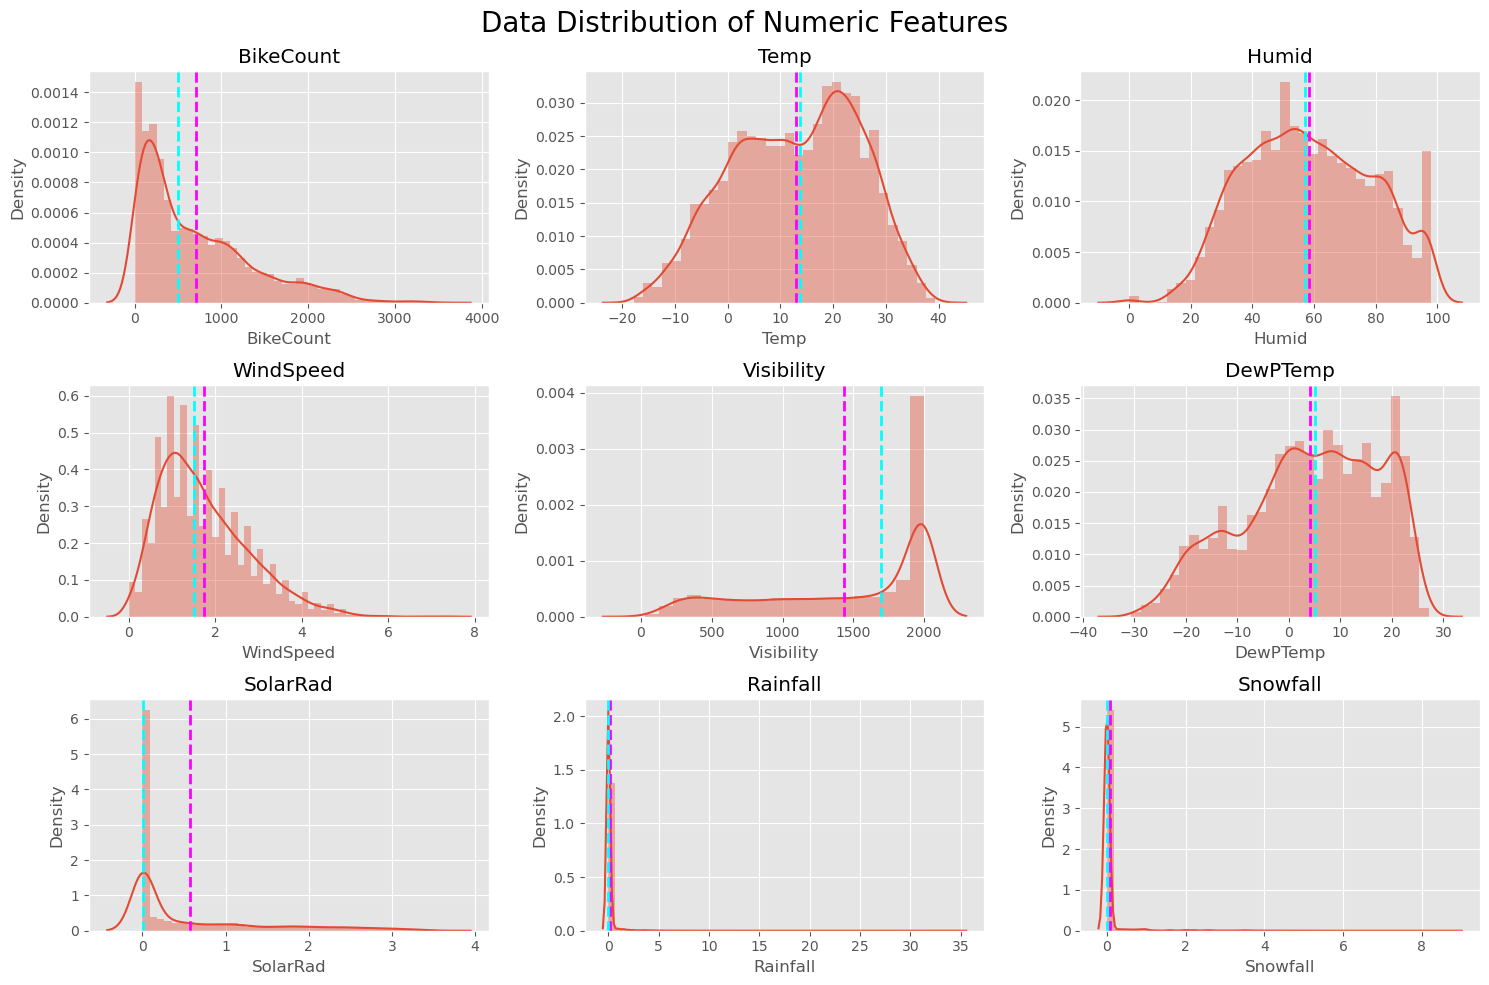

In [114]:
# figsize
plt.figure(figsize=(15,10))

# title
plt.suptitle('Data Distribution of Numeric Features', fontsize = 20)

for i, col in enumerate(numerical_features):
  # subplots 3 rows and 3 columns
  plt.subplot(3, 3, i+1 )

  # dist plot
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)

  plt.title(col)
  plt.tight_layout()

#### Obervations:

For numerical features, we can see that the majority of distributions are right-skewed and few are left-skewed.
* Right-skewed columns: Rented Bike Count, Wind Speed, Solar Radiation, Rainfall, Snowfall.
* Left-skewed columns: Visibility and Dew point temperature

### 3.2.2 Outliers of Numerical Features

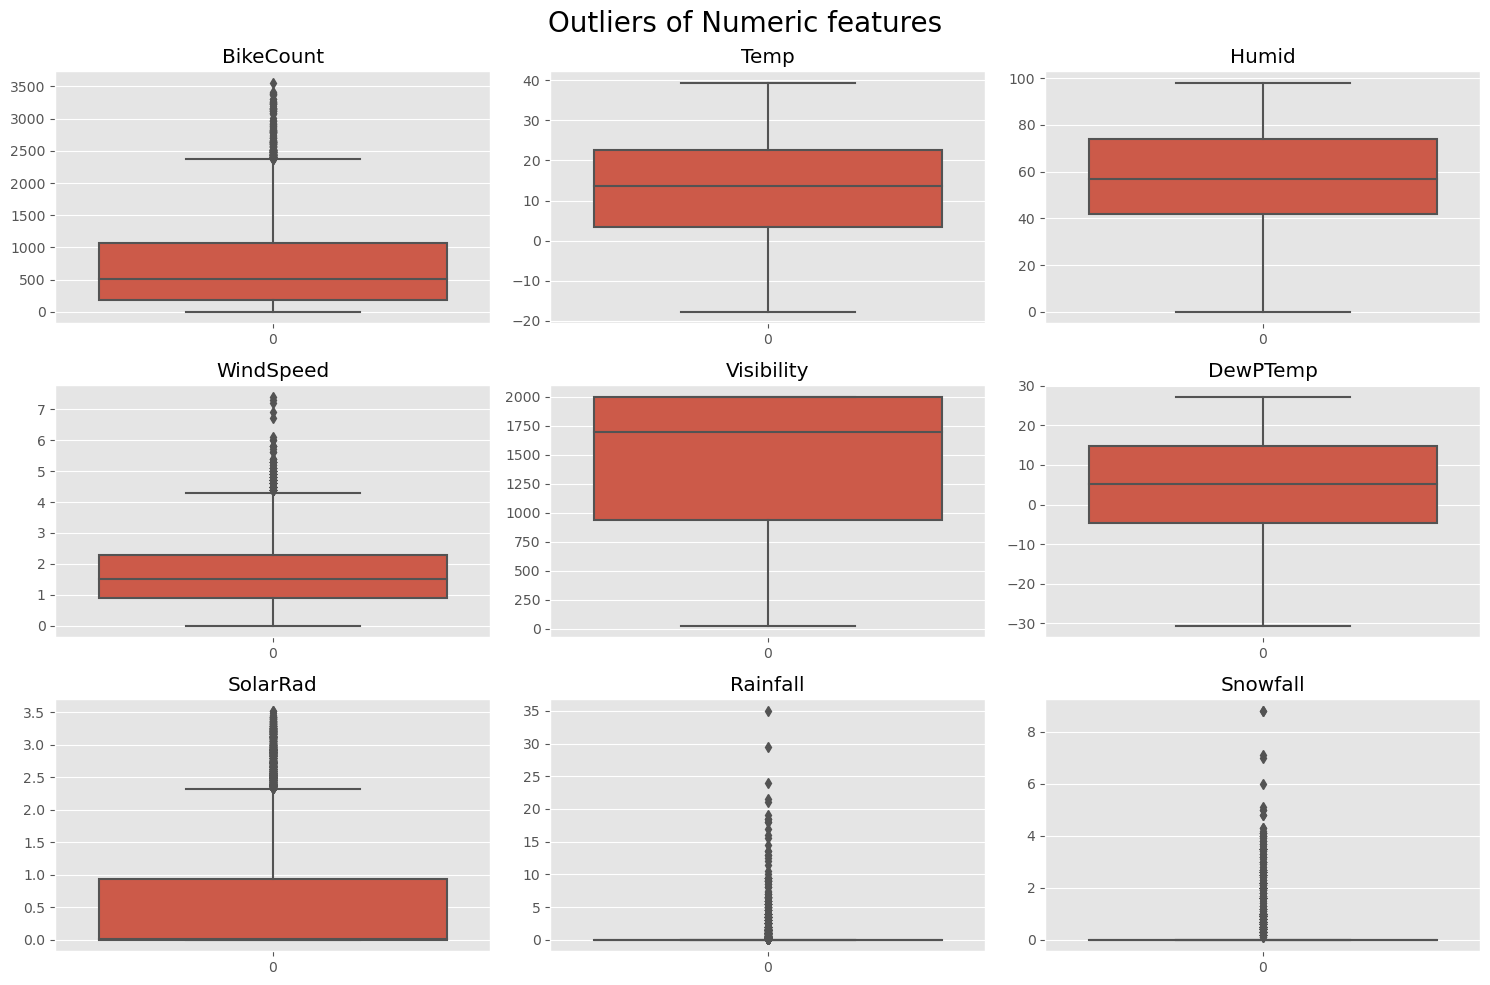

In [111]:
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outliers of Numeric features', fontsize = 20)

for i, col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(3,3, i+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()

#### Observations:

Outliers are visible in most of the numerical columns.
* These columns are Rented Bike Count, Wind Speed, Solar Radiation, Rainfall & Snowfall.
* The columns like Temperature, Humidity, Visibility & Dew point temperature do not contain any outliers.

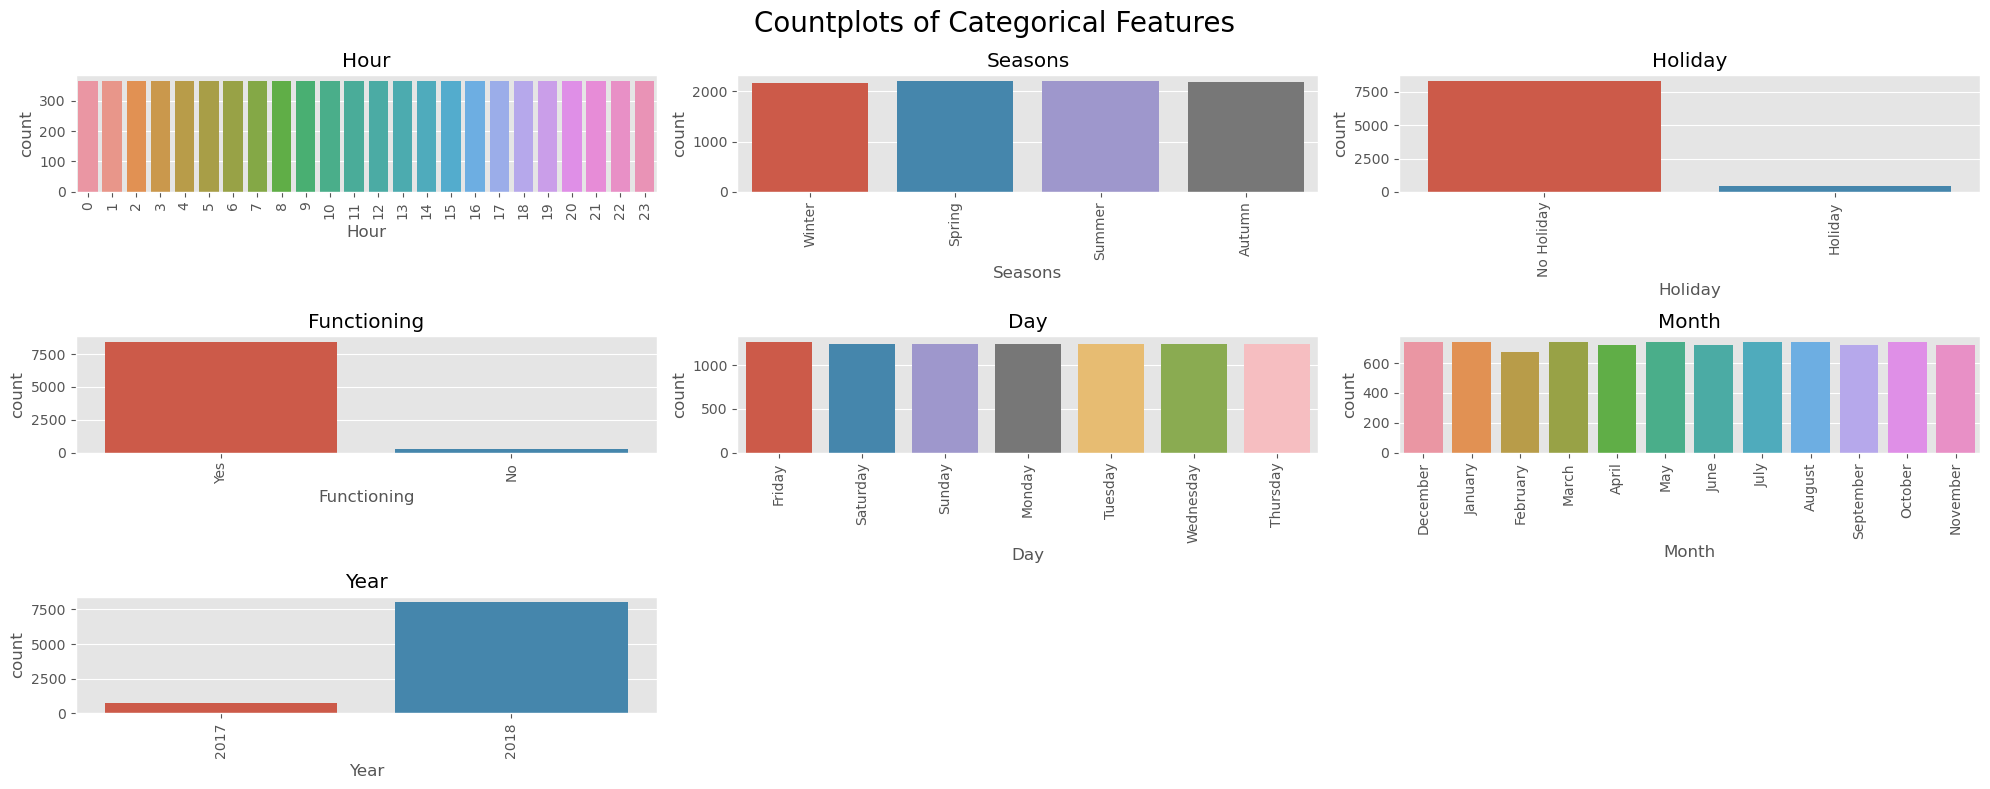

In [118]:
# figure
plt.figure(figsize = (20,8))

# title
plt.suptitle('Countplots of Categorical Features', fontsize = 20)

for i, col in enumerate(categorical_features):
  # subplots of
  plt.subplot(3,3, i+1)

  # Countplots
  sns.countplot(x = categorical_features[col])

  plt.xticks(rotation ='vertical')
  plt.title(col)
  plt.tight_layout()


#### Observations:

* Every hour has an equal number of counts in the dataset.
* Every season has almost equal number of counts.
* Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.
* Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.
* Except Friday, other Days have equal number of counts in the dataset.
* Months like April, June, September, November & February have a slightly low number of count comparted to other months.
* More data was colected in the year 2018 than 2017.

## 3.3 Bivariate Analysis

### 3.3.1 Target variable and numerical features

<Figure size 640x480 with 0 Axes>

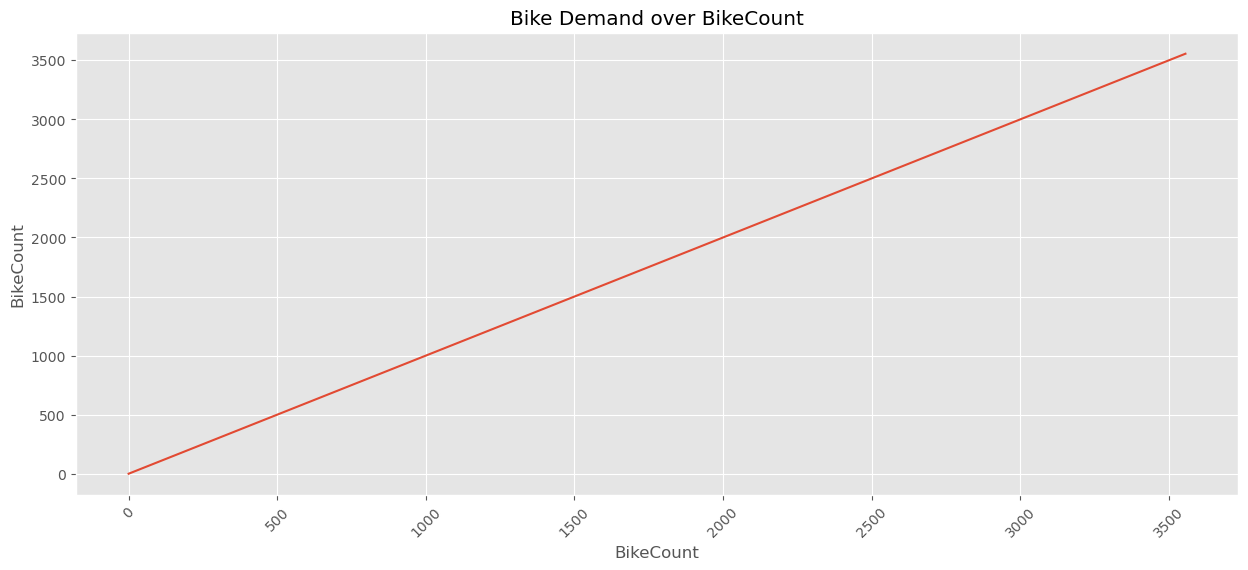

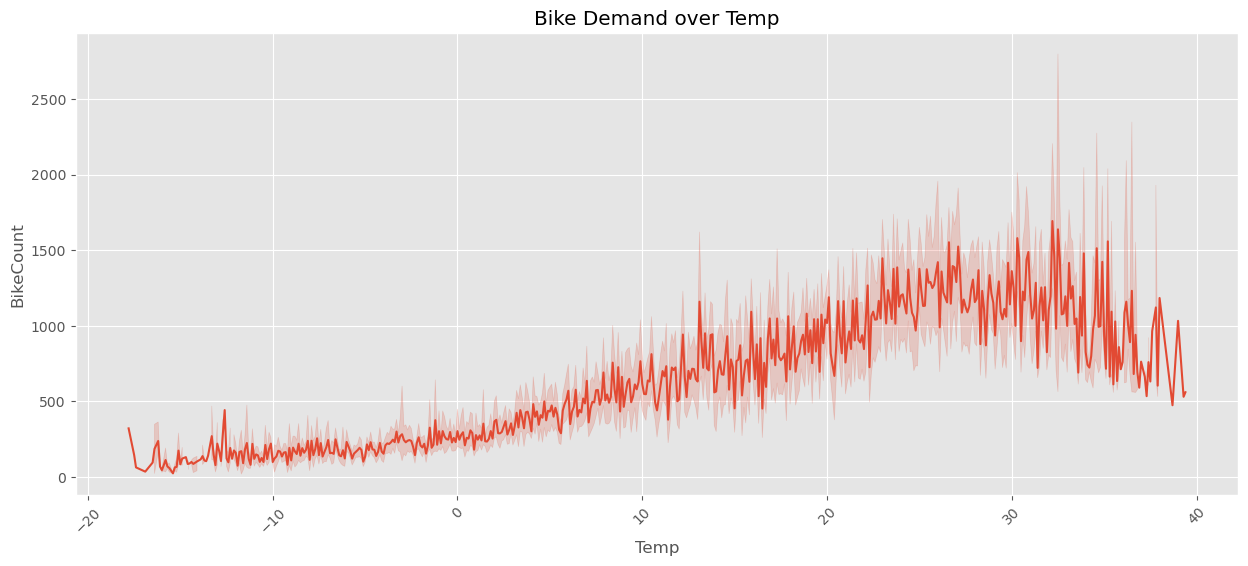

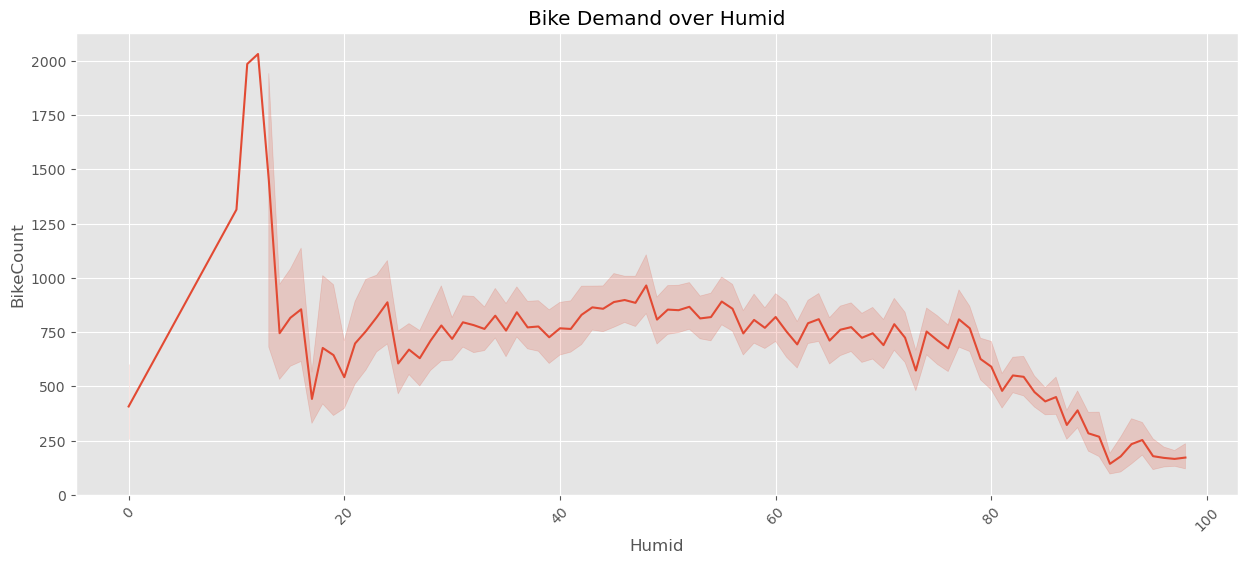

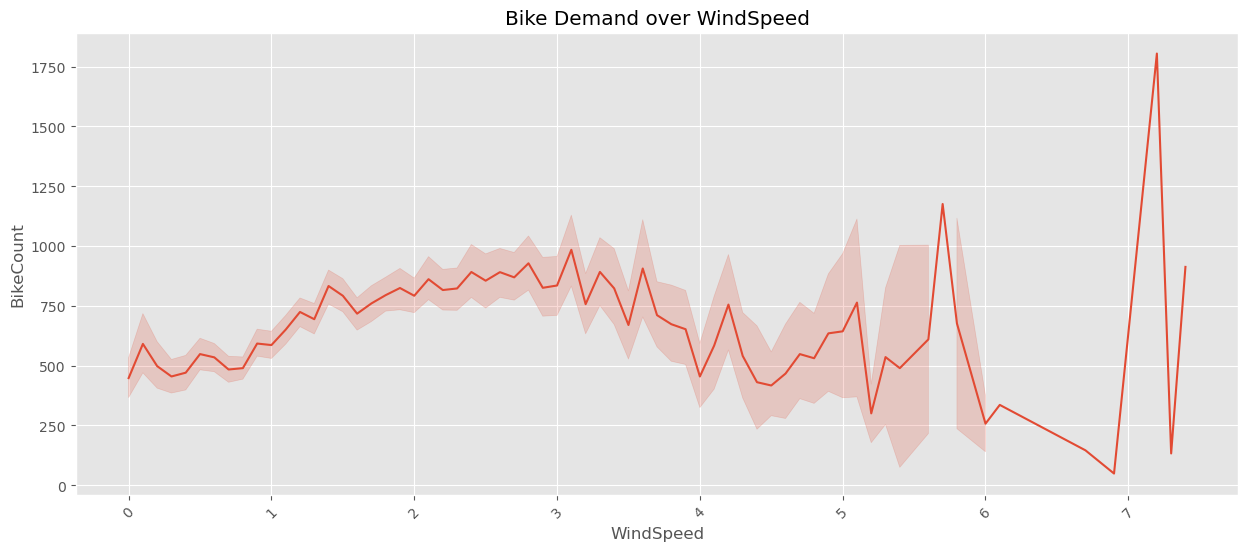

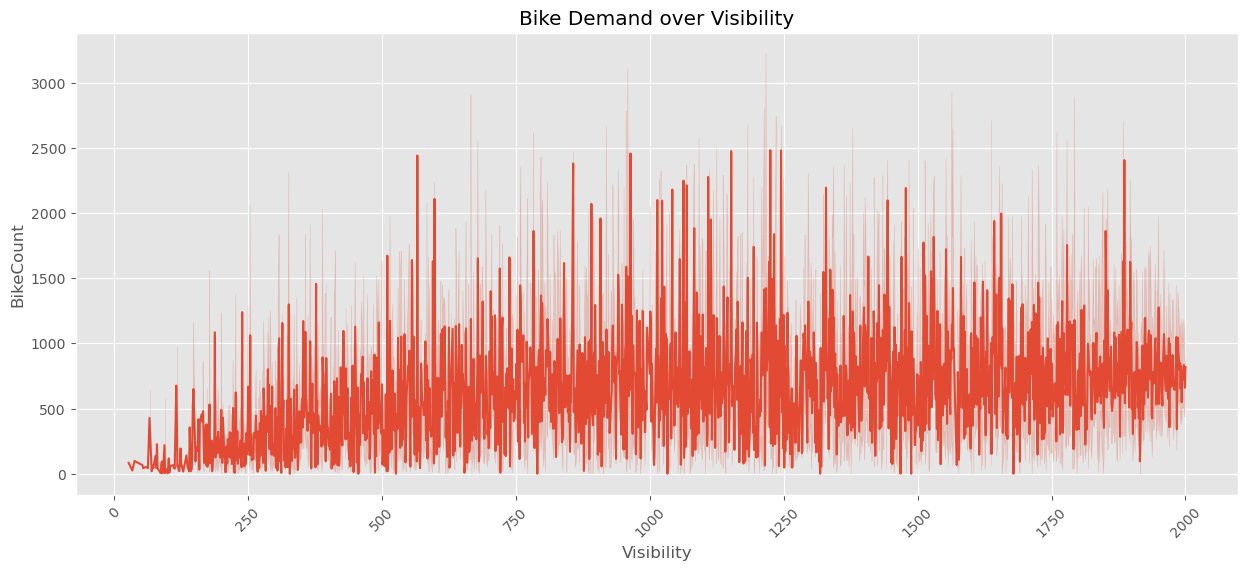

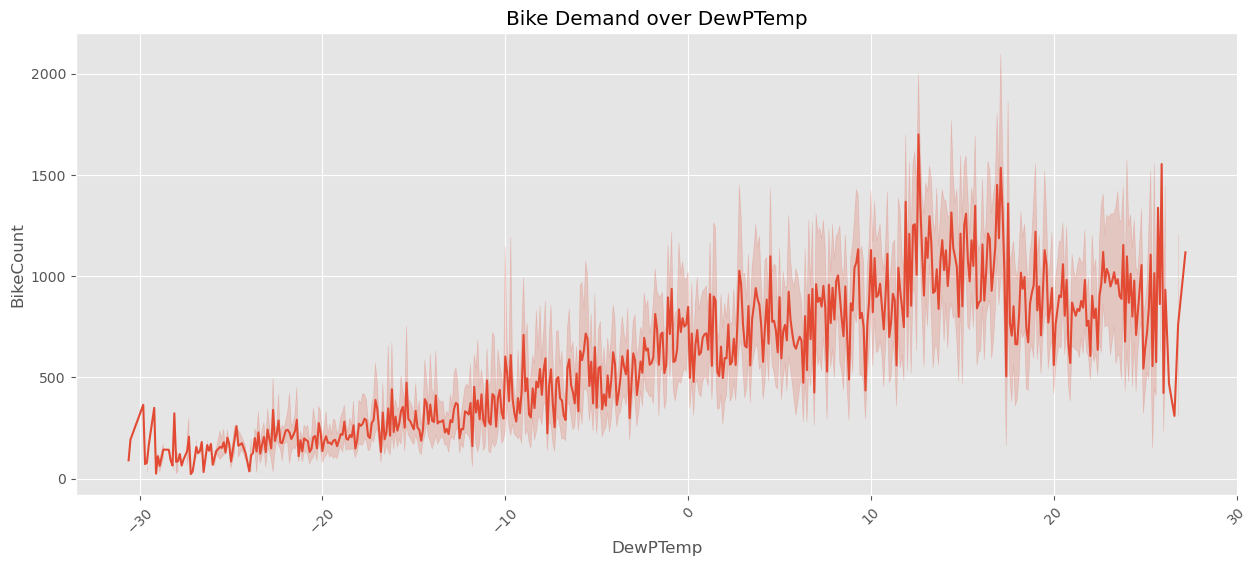

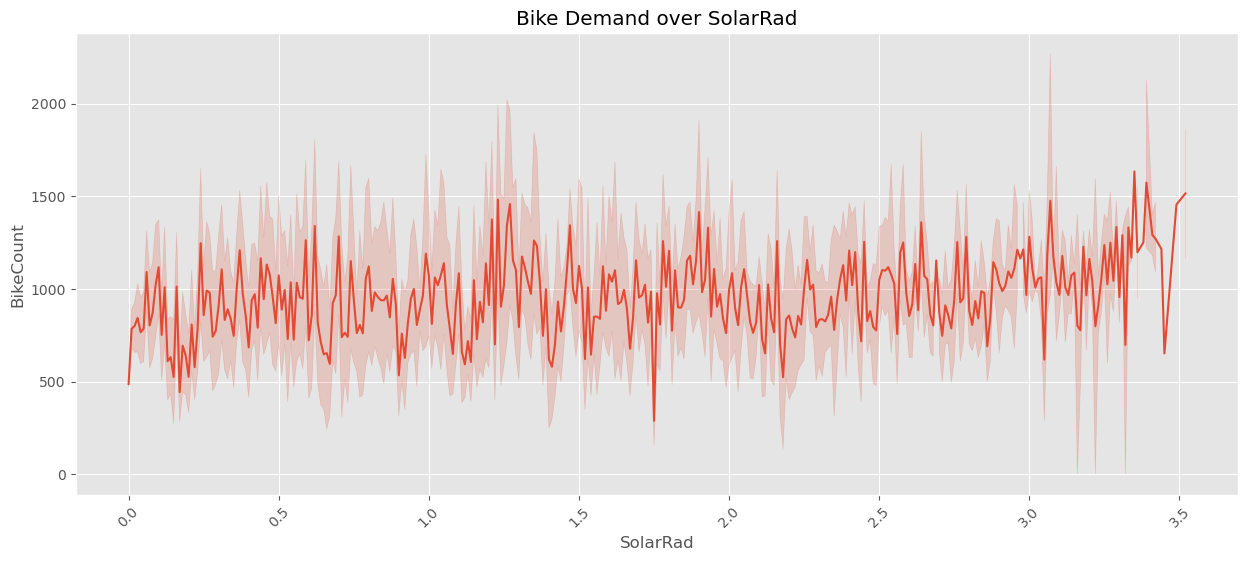

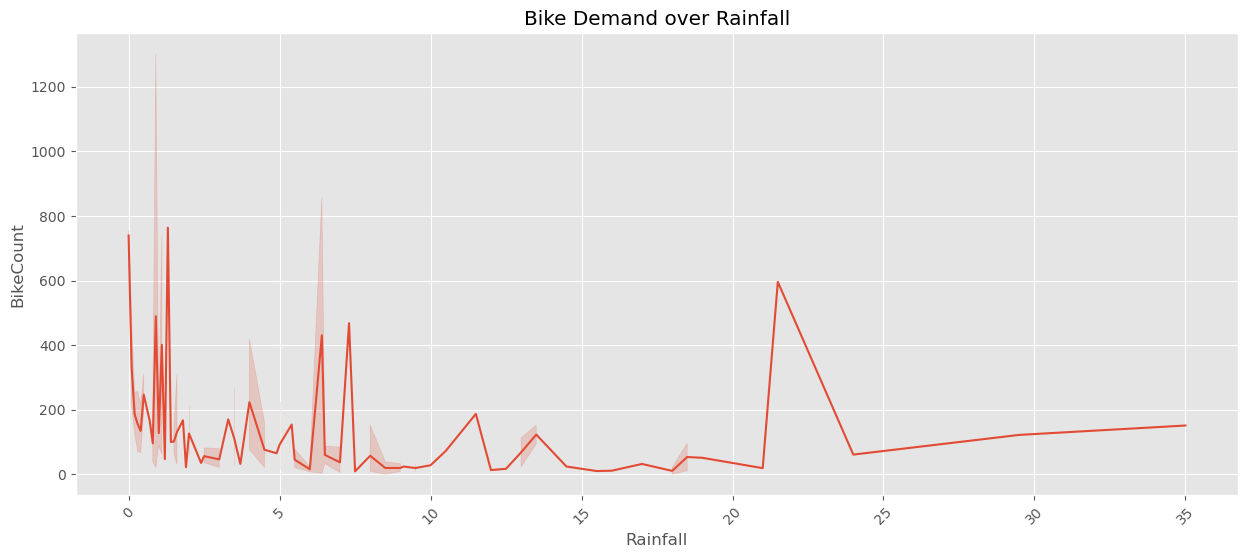

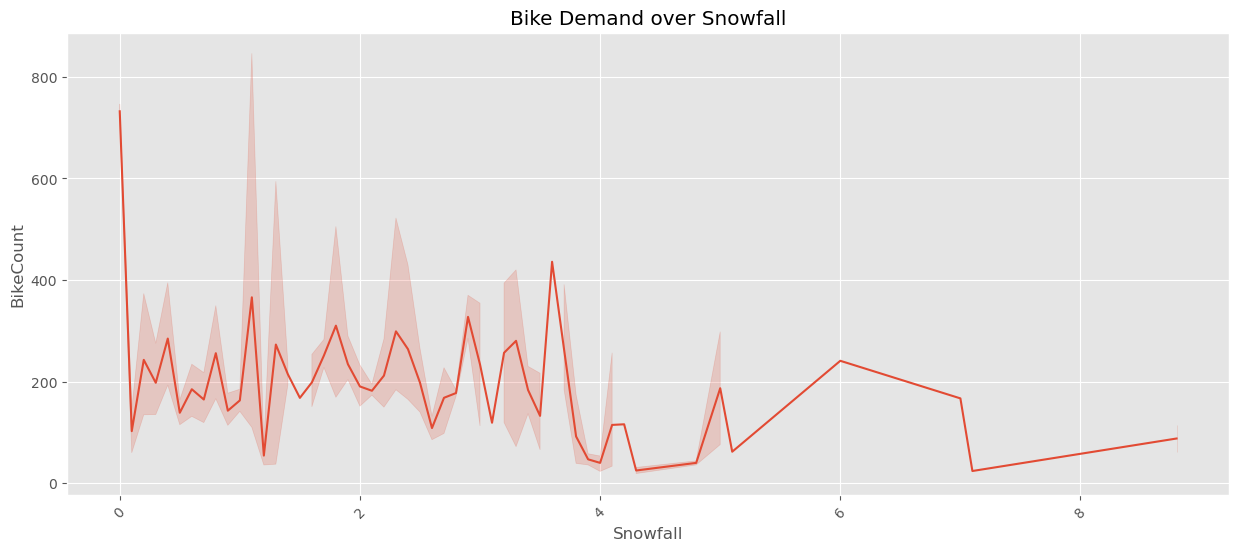

In [116]:
# Identify patterns and trends in numerical features

plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20)

for i in numerical_features:
  plt.figure(figsize=(15,6))
  sns.lineplot(x= i, y='BikeCount', data = numerical_features, palette='Grouped')
  plt.title(f"Bike Demand over {i}");
  print('\n')
  plt.xticks(rotation = 45)
  plt.show()

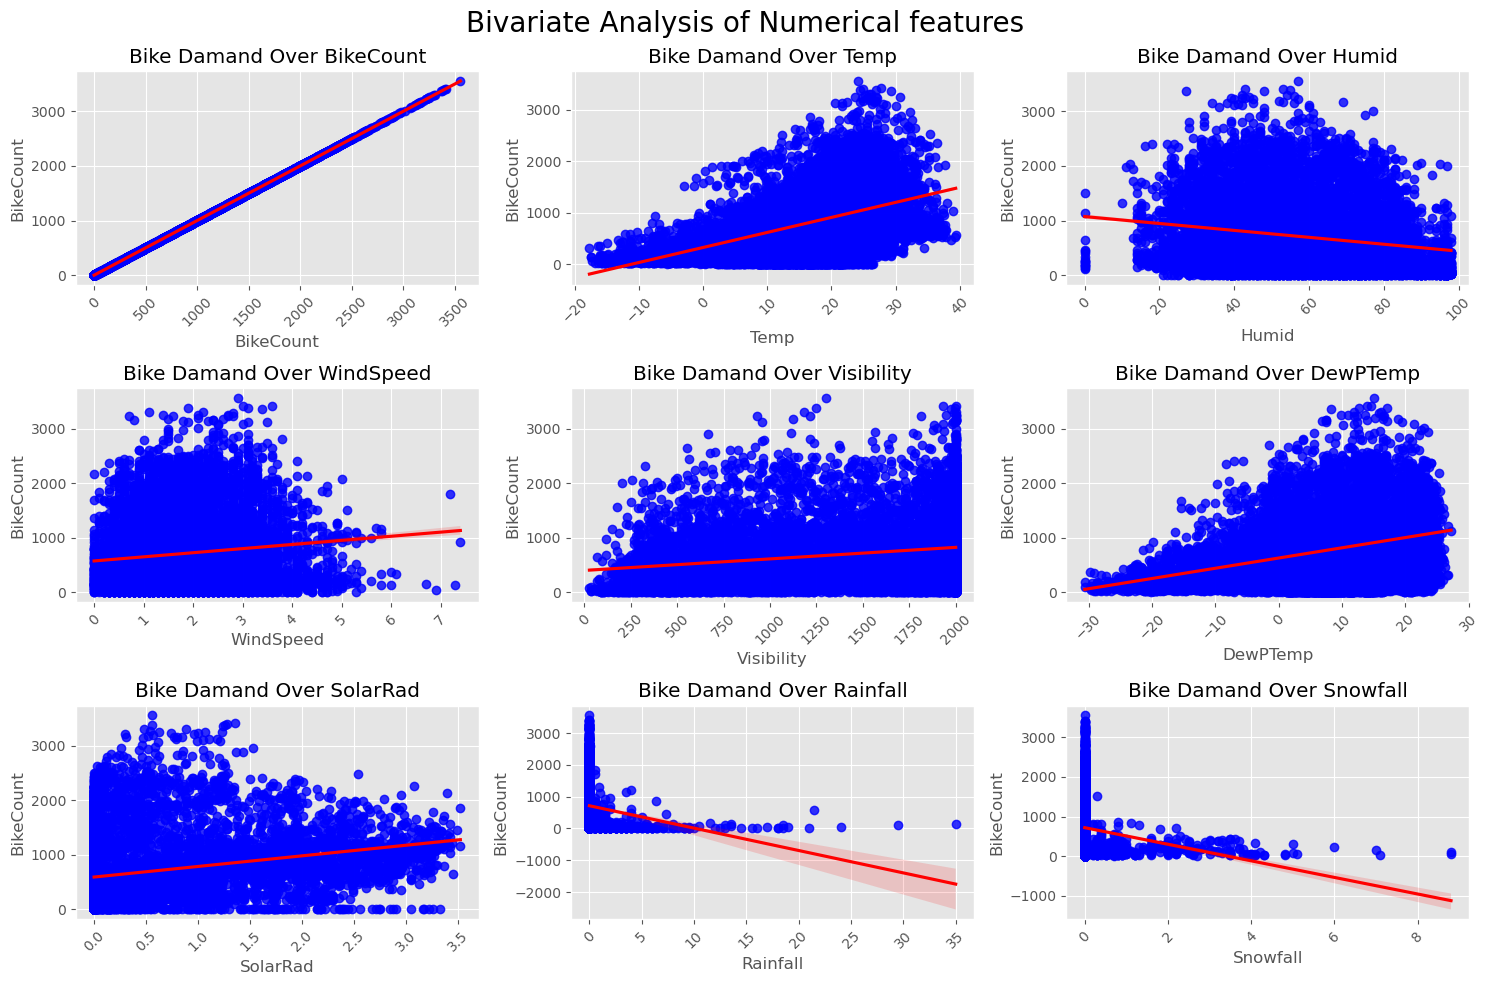

In [146]:
plt.figure(figsize = (15, 10))

# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20)

for index, col in enumerate(numerical_features):

  # subplots of 3 rows and 3 columns
  plt.subplot(3,3, index+1)

  # line plot
  sns.regplot(x = numerical_features[col], y = numerical_features['BikeCount'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

  plt.title(f'Bike Damand Over {col}')
  plt.xticks(rotation = 45)
  plt.tight_layout()

#### Observations:

The above scatter plots for the numerical features indicate that the columns Temperature, Wind_speed, Visibility, Dew_point_temperature & Solar_Radiation are positively correlated with the target variable, ie , with an increase in these features results in an increase in rented bike count.

On the other hand, Rainfall, Snowfall & Humidity are negatively correlated with the target variable, indicating that with an increase in these features results in a decrease in rented bike count.

### 3.3.2 Target variable and categorical features

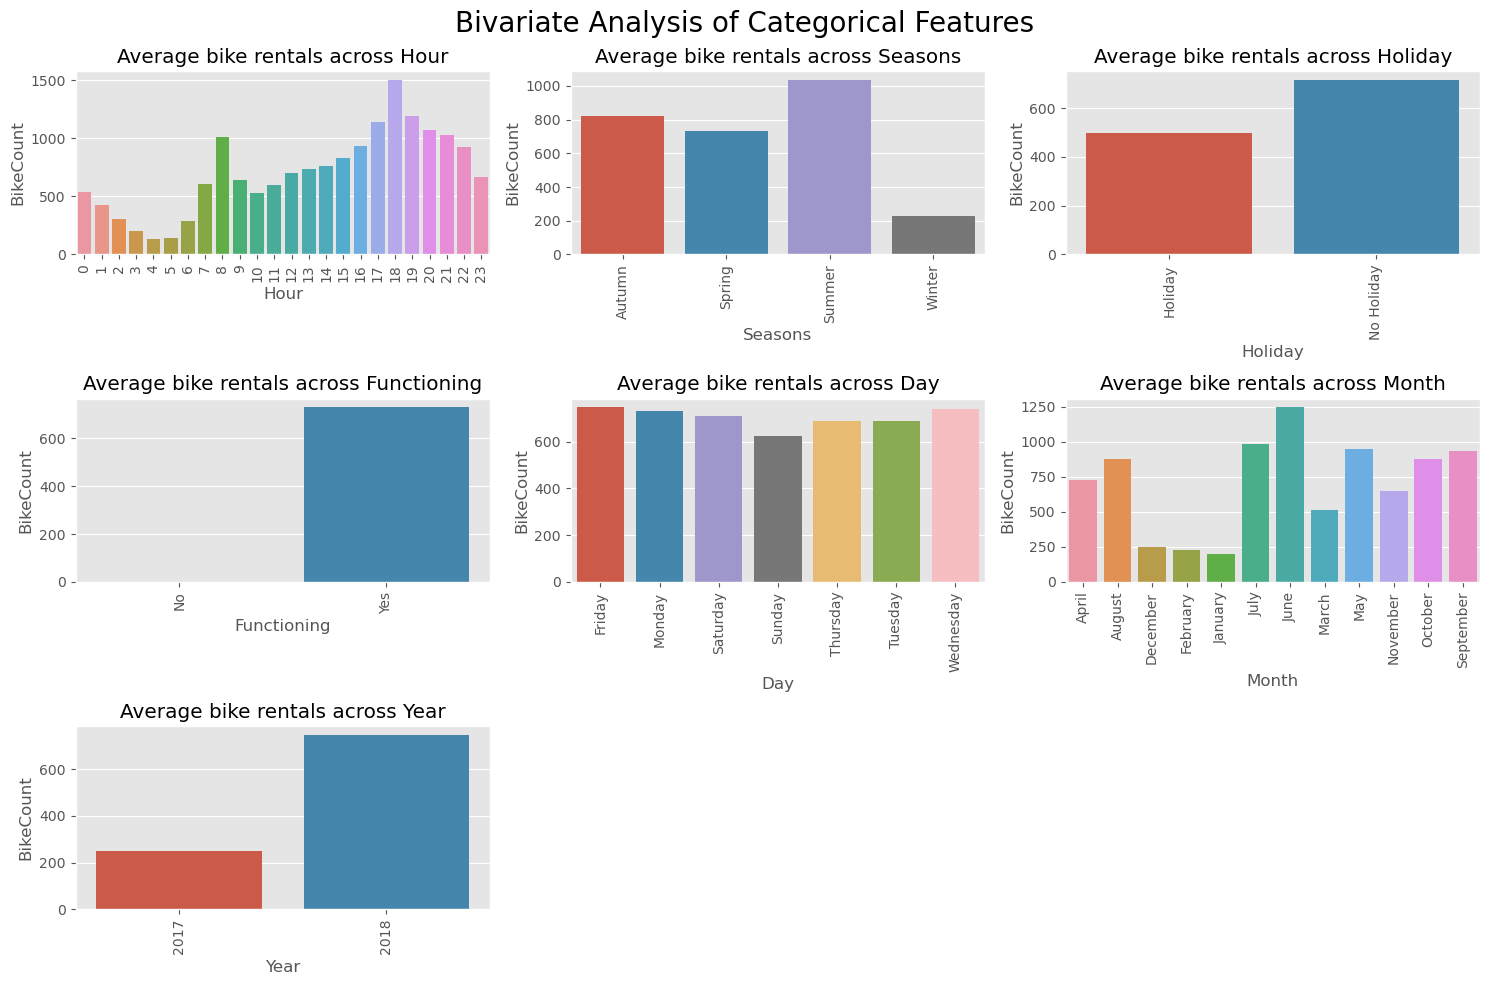

In [115]:
# Counting number of category present in each feature with respect to target feature

# figsize
plt.figure(figsize=(15,10))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20)

for i,col in enumerate(categorical_features):
   # subplots of 3 rows and 3 columns
  plt.subplot(3, 3, i+1)
  a = df.groupby(col)[['BikeCount']].mean().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['BikeCount'])
  # x-axis label
  plt.title(f'Average bike rentals across {col}')
  plt.xticks(rotation = 'vertical')
  plt.tight_layout()

#### Observations:

* **Hours**: The highest demand is in hours from 7 to 10 and from 15 to 19. This could be the reason that in most of the metroploitan cities this is the peak office time and so more people would be renting bikes.import itertools
* **Seasons**: Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.
* **Holidays**: High number of bikes were rented on No Holidays.
* **Functioning Day**: On 'No Functioning Day, only 295 bikes were rented. Hence, this column does not add value to our prediction, we can drop this column in the next steps.
* **Day**: Most of the bikes were rented on Weekdays compared to weekends.
* **Month**: From March Bike Rent Count started increasing and it was highest in June.

## 3.4 Multivariate Analysis

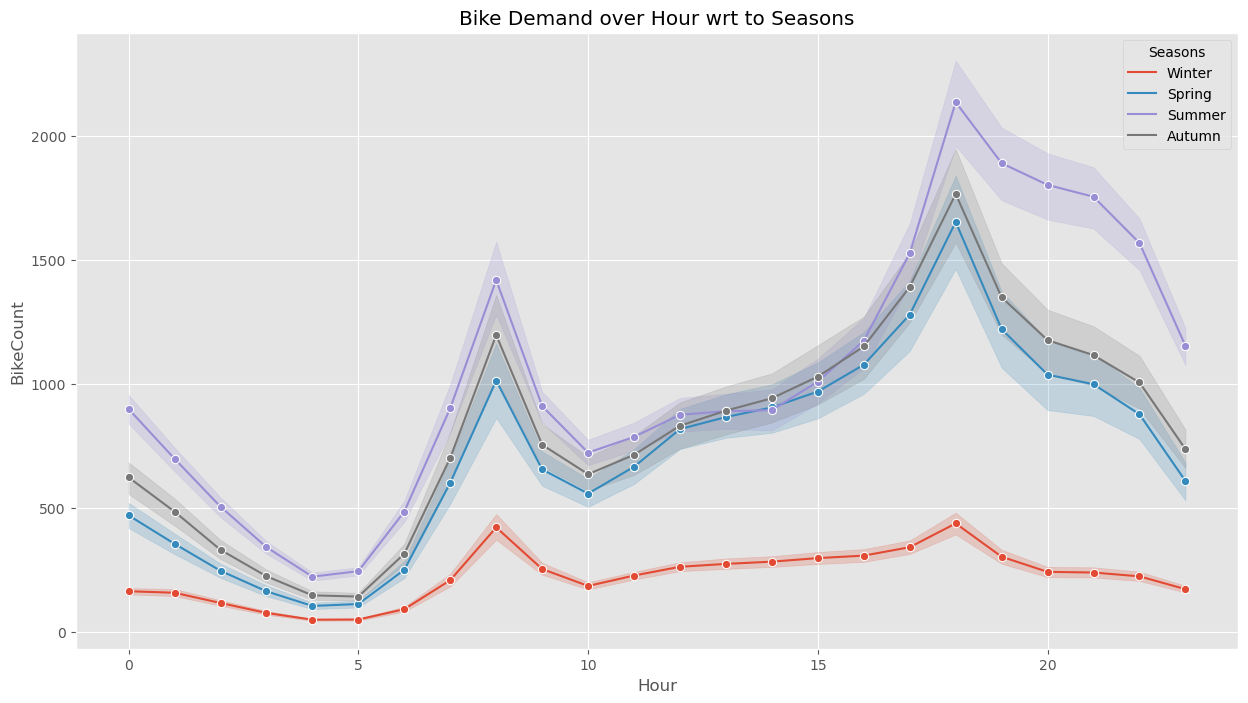

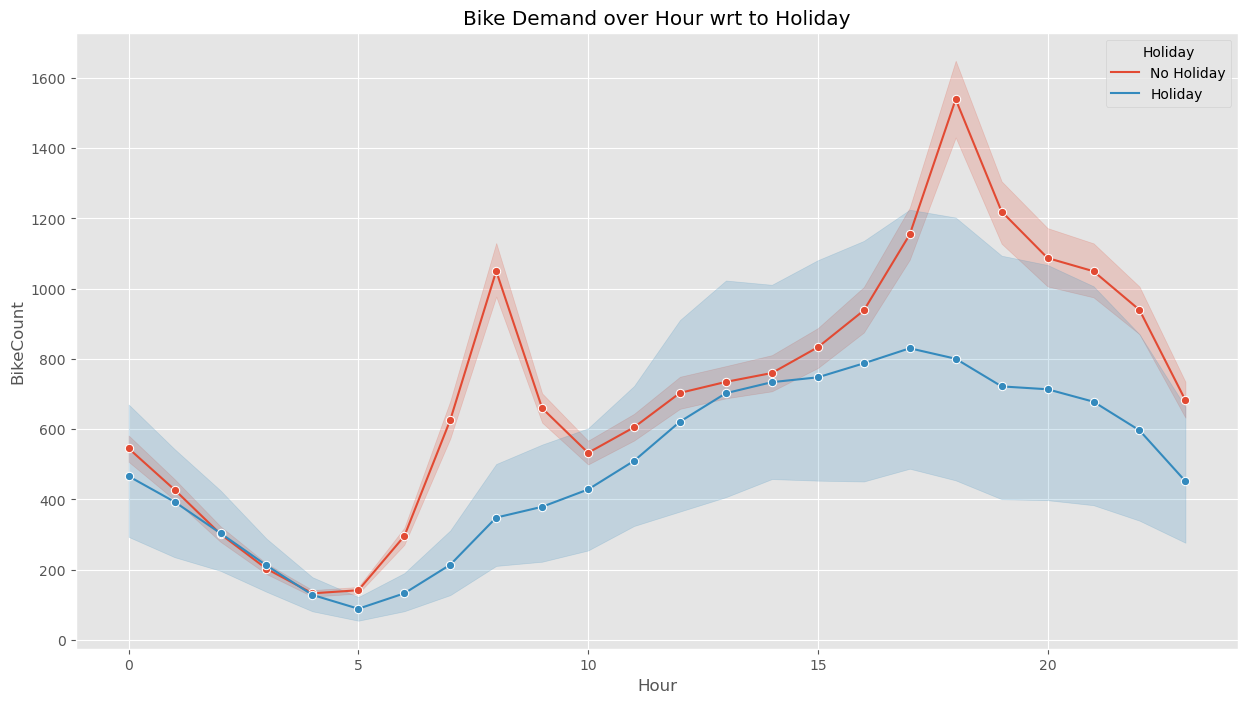

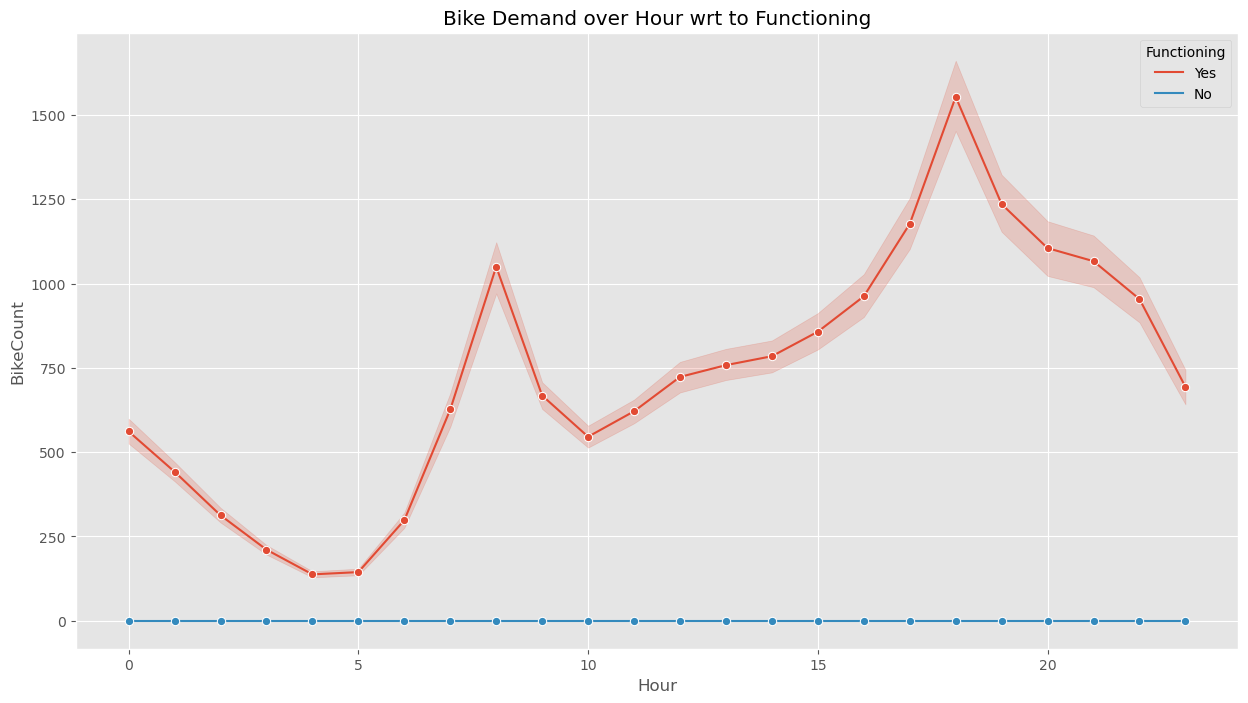

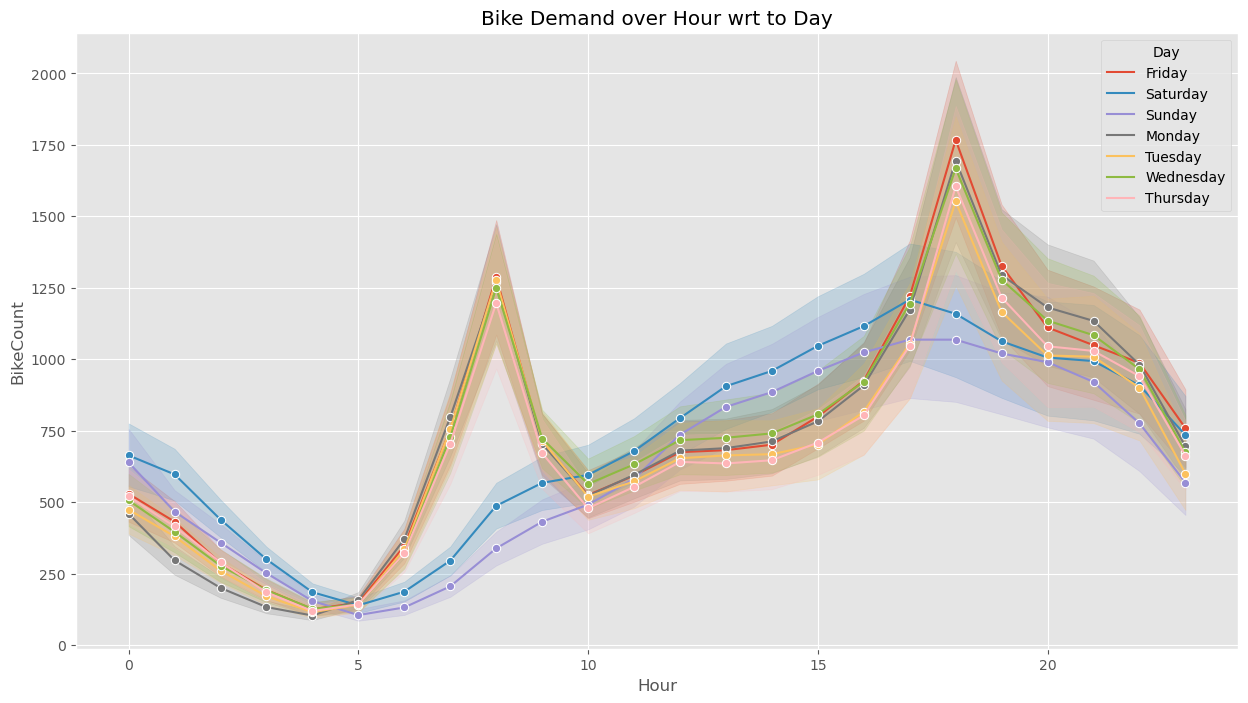

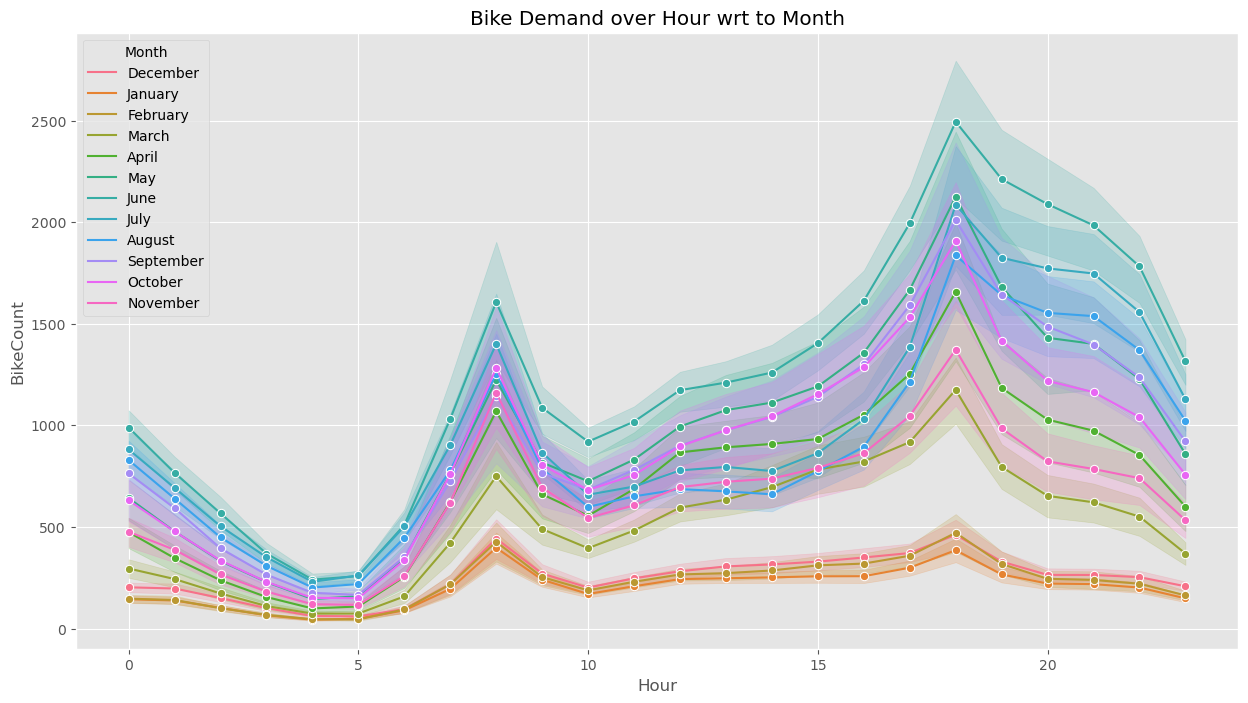

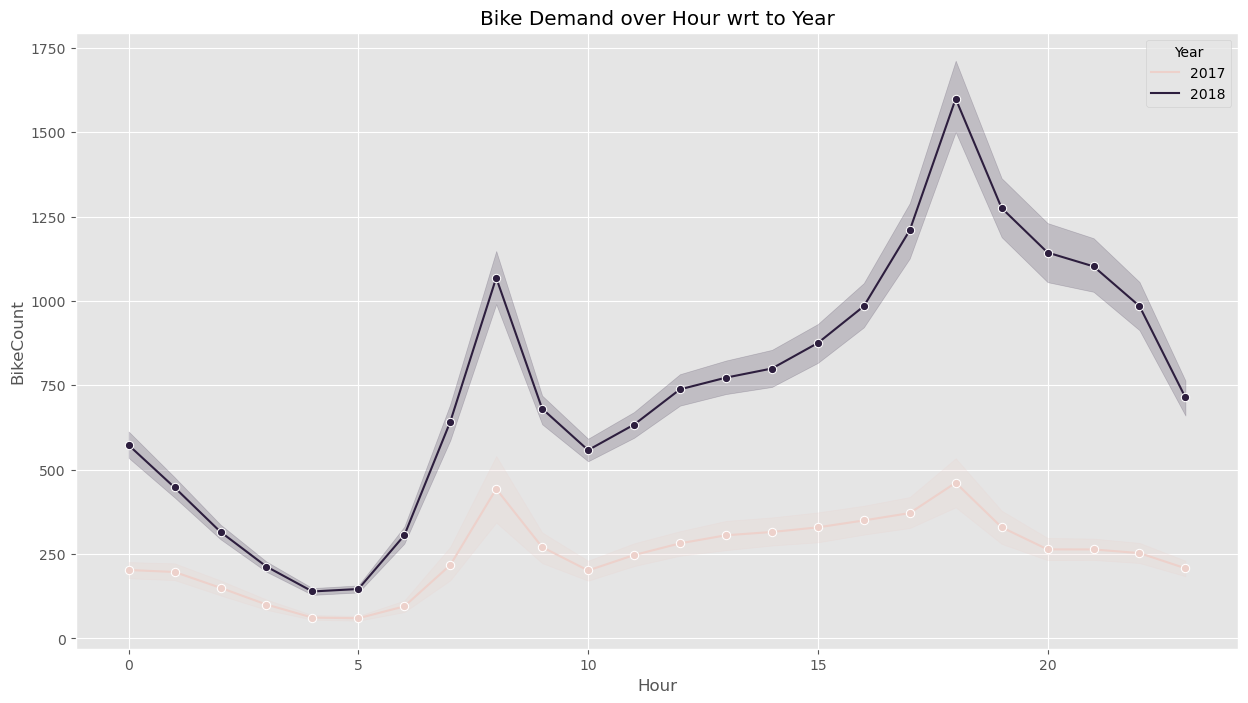

In [87]:
# Analysing bike demand with respect to hour and different third value

for i in categorical_features:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,8))
    sns.lineplot(x= df["Hour"], y= df['BikeCount'], hue= df[i], marker ='o')
    plt.title(f"Bike Demand over Hour wrt to {i}")
  plt.show()

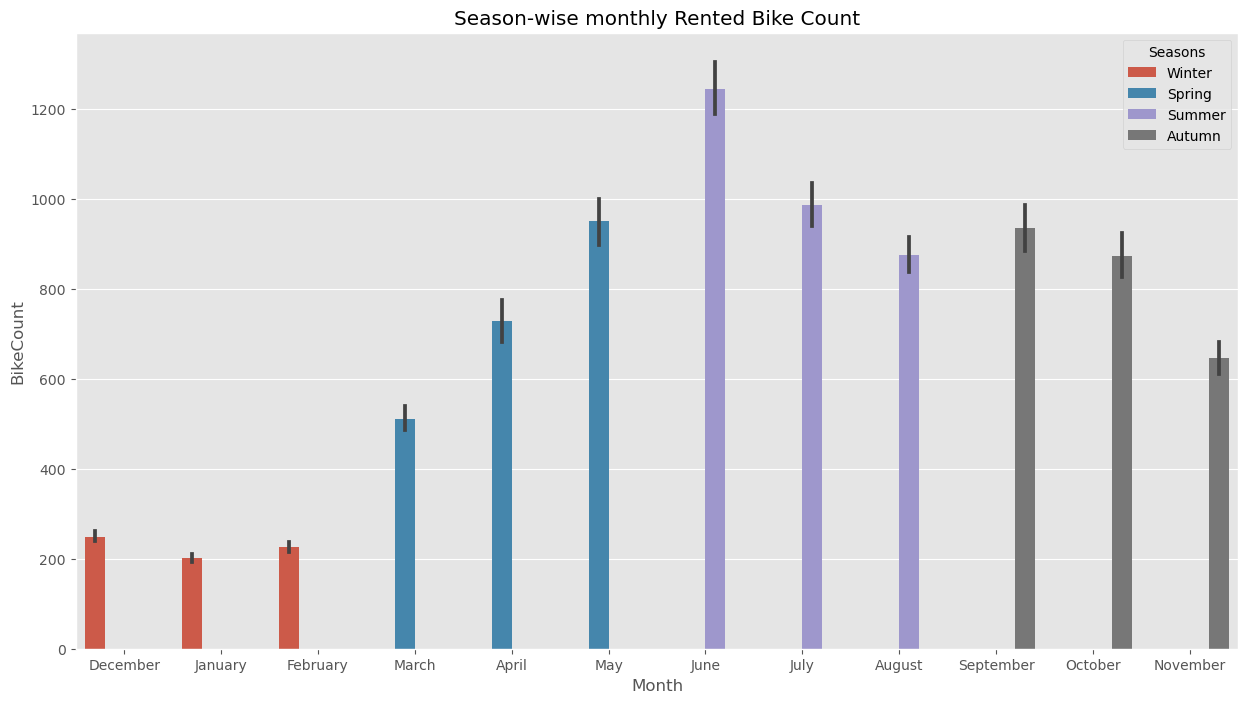

In [88]:
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='BikeCount',data= df, hue='Seasons',ax=ax);
ax.set_title('Season-wise monthly Rented Bike Count')
plt.show()

#### Observations:

The above regression plots for the numerical features indicate that the columns Temperature, Wind_speed, Visibility, Dew_point_temperature & Solar_Radiation are positively correlated with the target variable, ie , with an increase in these features results in an increase in rented bike count.

On the other hand, Rainfall, Snowfall & Humidity are negatively correlated with the target variable, indicating that with an increase in these features results in a decrease in rented bike count.

# 4. Data Cleaning

### Handling missing & duplicate values

In [89]:
# Dataset Duplicate Value Count
print('The number of duplicated values in each column:' , df.duplicated().sum())
print ('Missing values:\n', df.isnull().sum())

The number of duplicated values in each column: 0
Missing values:
 BikeCount      0
Hour           0
Temp           0
Humid          0
WindSpeed      0
Visibility     0
DewPTemp       0
SolarRad       0
Rainfall       0
Snowfall       0
Seasons        0
Holiday        0
Functioning    0
Day            0
Month          0
Year           0
dtype: int64


As we can see there are no missing & duplicate values, so we can move ahead.

### Handling outliers

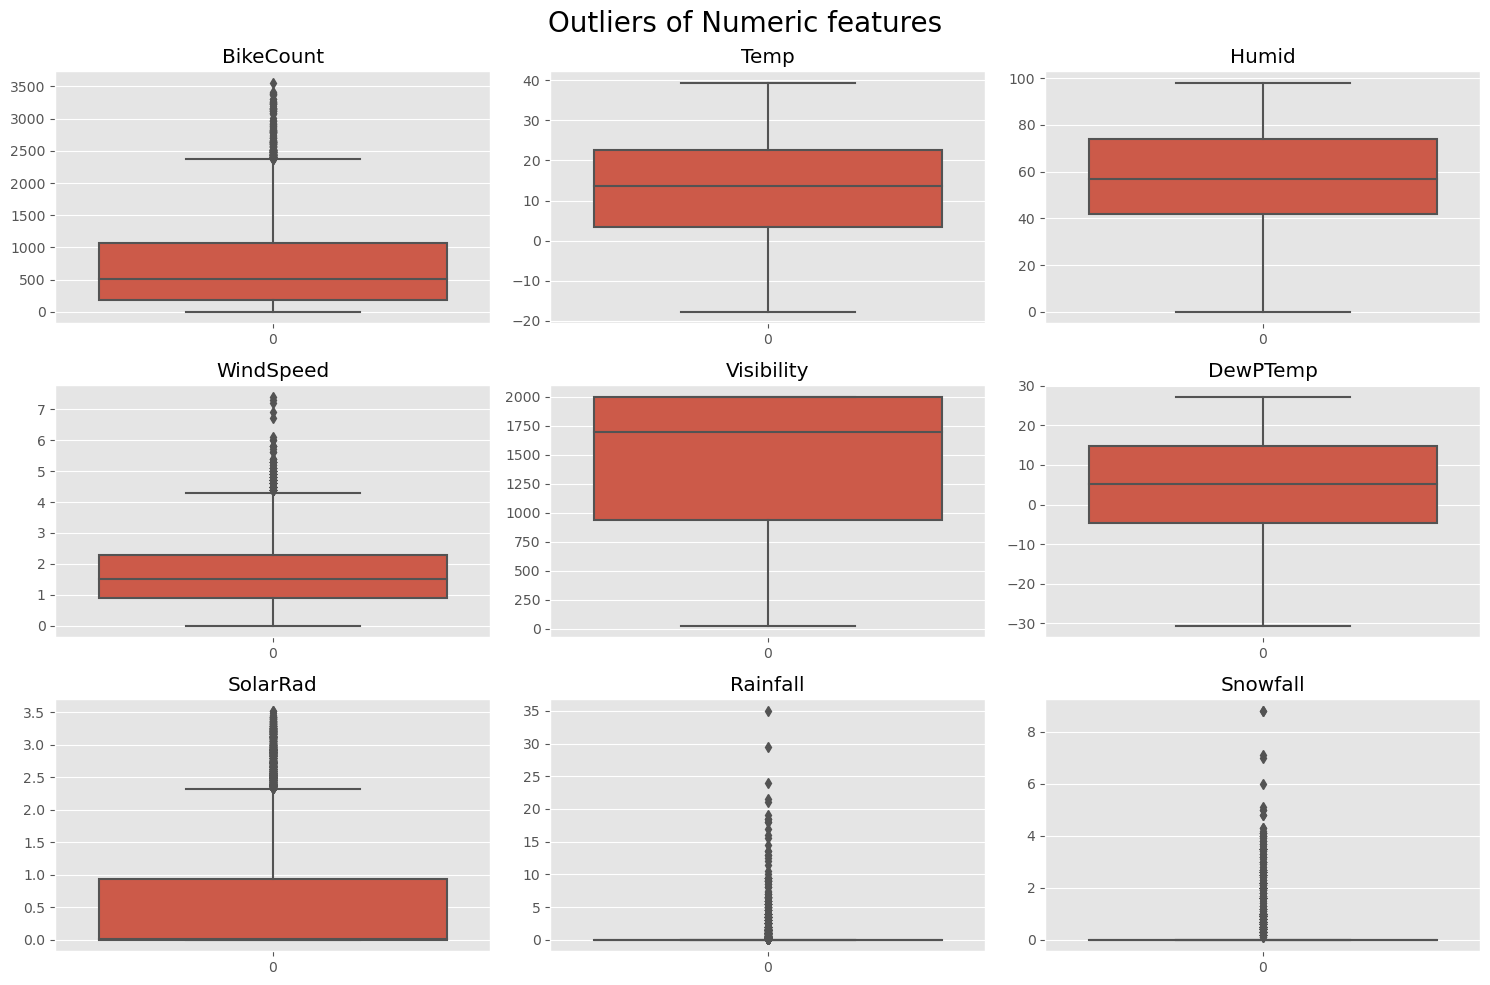

In [113]:
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outliers of Numeric features', fontsize = 20)

for i, col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(3,3, i+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()

We could see that **BikeCount, WindSpeed, SolarRad, Rainfall, Snowfall** contains outliers

In [163]:
#Creating a list of columns that contains outliers
outlier_cols = ['BikeCount', 'WindSpeed', 'SolarRad', 'Rainfall','Snowfall']
outlier_cols
     

def calculate_ranges(data, column):

  # Skip categorical columns
  if data[column].dtype == 'object':
    return None, None
  else:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate upper and lower ranges
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR

    return upper_range, lower_range

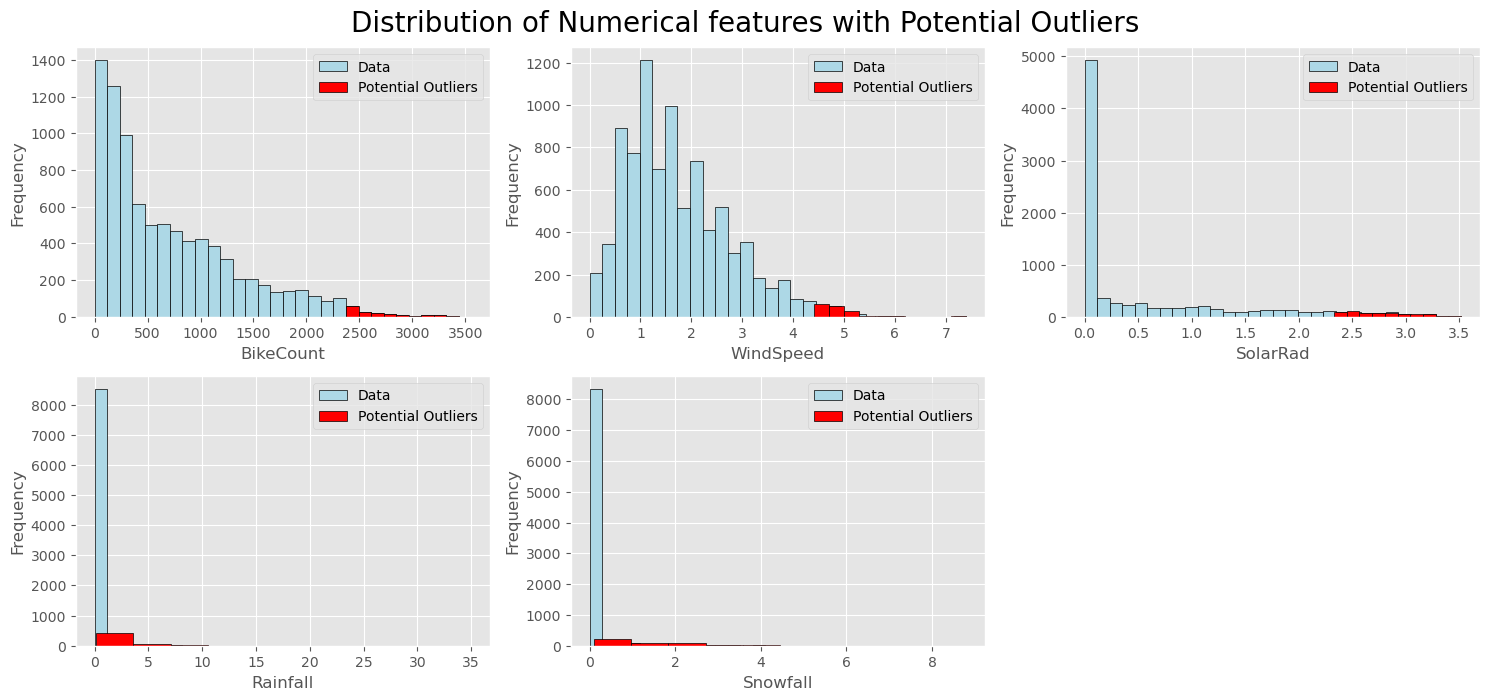

In [164]:
# Identify potential outliers
plt.figure(figsize = (15,10))

for index, col in enumerate(outlier_cols):

  # Apply calculate_ranges function to get upper bound and lower bound
  upper_bound, lower_bound = calculate_ranges(df, col)

  # Identify potential outliers
  outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]

# Visualize the potential outliers
  #plt.figure(figsize=(8, 6))

  # subplots 3 rows, 3 columns
  plt.subplot(3,3, index+1)
  plt.hist(df[col], bins=30, color='lightblue', edgecolor='black', label='Data')
  plt.hist(outliers[col], bins=10, color='red', edgecolor='black', label='Potential Outliers')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.suptitle('Distribution of Numerical features with Potential Outliers', fontsize = 20)
  plt.legend()
  plt.tight_layout()
  #plt.show()
     

In [165]:
# Create a function to count the total number of outliers in each column

def count_outliers(data):
    # Initialize a variable to store the total number of outliers
    outlier_count = {}

    # Loop through each column in the list containing outliers
    for col in outlier_cols:

        # Calculate the upper and lower ranges
        upper_range, lower_range = calculate_ranges(data, col)

        # Count the number of outliers in the column
        outlier_count[col] = len(data[(data[col] > upper_range) | (data[col] < lower_range)])

    return outlier_count


# Number of outliers in each column
count_outliers(df)

{'BikeCount': 158,
 'WindSpeed': 161,
 'SolarRad': 641,
 'Rainfall': 528,
 'Snowfall': 443}

#### Observation:

It is not wise to trim the entire outliers as we tend to lose many data points. Hence we are not simply removing the outlier instead of that we are using the clipping method. In the clipping method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [166]:
# We do not want any transformation in our target variable as it is possible to have outlier in Seoul Environment
# Removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.

num_features = ['Temp', 'Humid', 'WindSpeed', 'Visibility', 'DewPTemp', 'SolarRad']

# We are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(bike_df):
    #numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew point temperature', 'Solar Radiation']

    for col in num_features:
        # Using IQR method to define the range of upper and lower limits
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replacing the outliers with the upper and lower bounds
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)

    return bike_df

In [167]:
new_df = df.copy()
# using the function to treat outliers
new_df = clip_outliers(new_df)

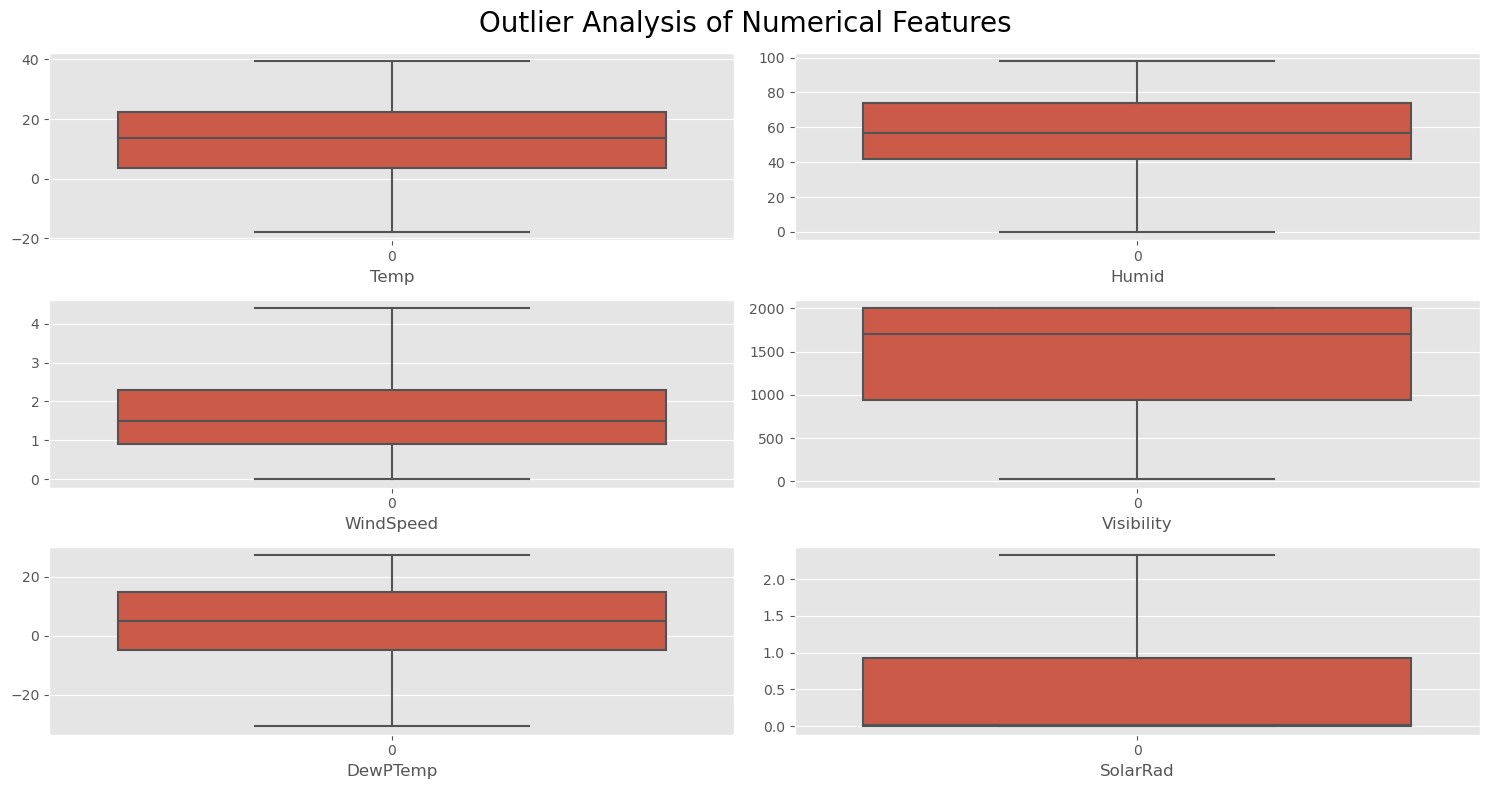

In [110]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,8))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20)

for i,col in enumerate(num_features):
  # subplot of 3 rows and 2 columns
  plt.subplot(3, 2, i+1)

  # countplot
  sns.boxplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

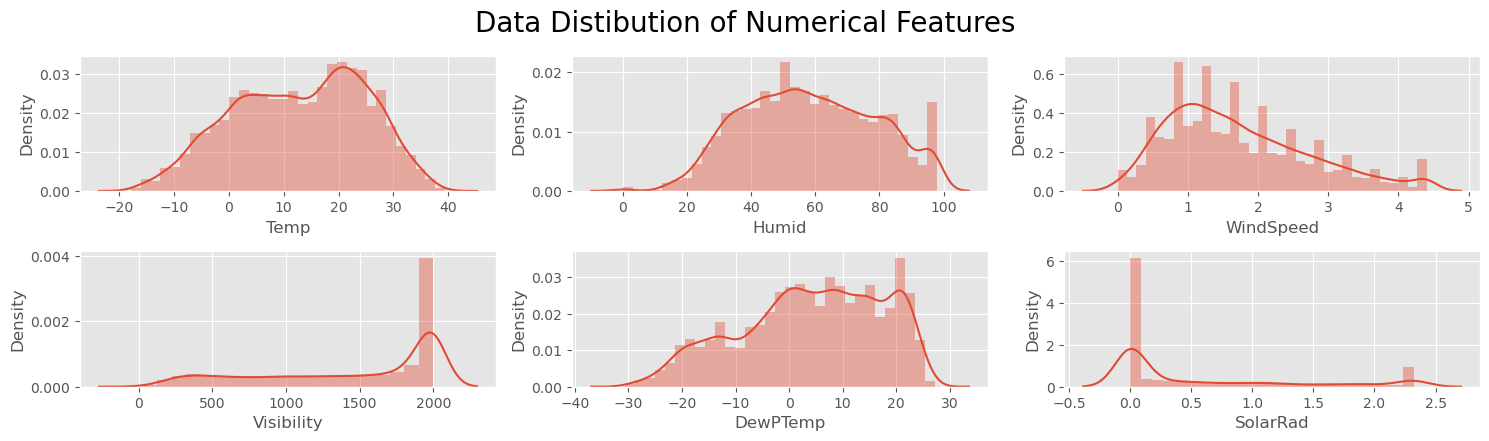

In [127]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20)

for i,col in enumerate(num_features):
  # subplots 3 rows, 2 columns
  plt.subplot(3, 3, i+1)

  # dist plots
  sns.distplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

# 5. Feature Engineering

## 5.1 Correlation Coefficient/Heatmap and VIF

As we checked regression plot on 3.3 section, most of the numerical features are positively correlated to our target variable. Let's check correlation plot.

variables        VIF
0        Temp  29.075866
1       Humid   5.069743
2   WindSpeed   4.517664
3  Visibility   9.051931
4    DewPTemp  15.201989
5    SolarRad   2.821604
6    Rainfall   1.079919
7    Snowfall   1.118903

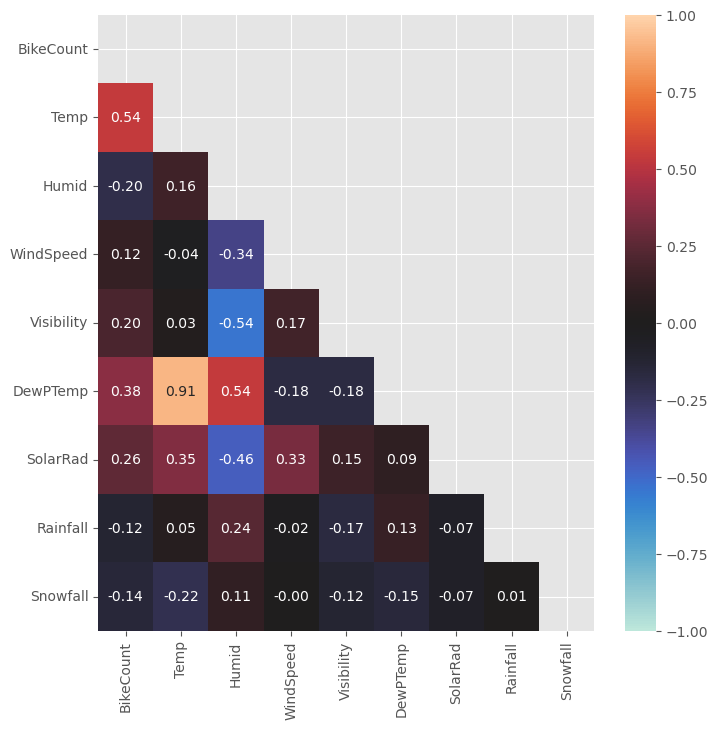

In [168]:
def corr_heatmap(df):
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=np.number)
    
    plt.figure(figsize=(8, 8))
    mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
    sns.heatmap(numeric_columns.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='icefire')

corr_heatmap(df)


from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# multicollinearity result

calc_vif(df[[i for i in new_df.describe().columns if i not in ['BikeCount','Date']]])

#### Observation:

From the above graph we could see that **Temperature** and **Dew Point Temperature** are highly corelated. We can drop one of them. As the corelation between Temperature and our dependent variable "Bike Rented Count" is high compared to Dew Point Temperature. So we will Keep the Temperature column and drop the Dew Point Temperature column.

variables       VIF
0        Temp  3.155378
1       Humid  4.774929
2   WindSpeed  4.252654
3  Visibility  4.446309
4    SolarRad  2.319736
5    Rainfall  1.078541
6    Snowfall  1.118709

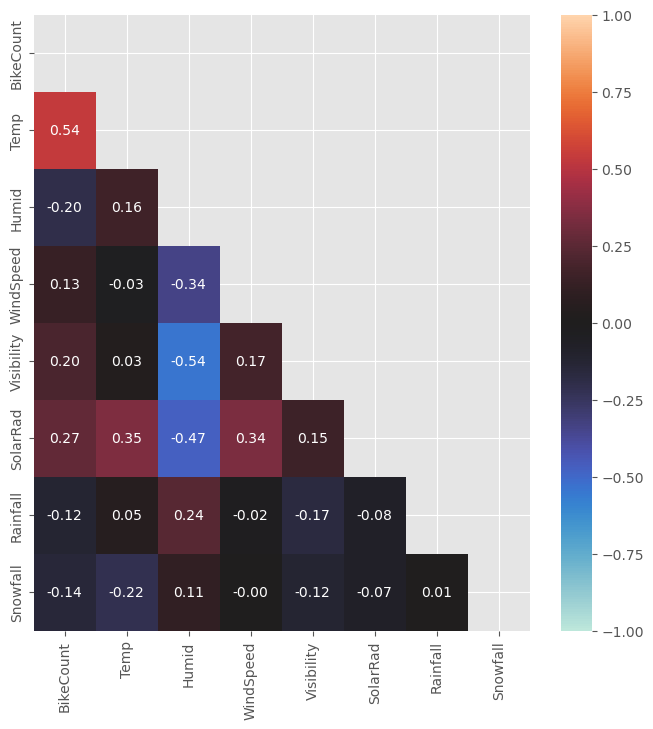

In [172]:
# droping Dew point temperature column due to multi-collinearity

new_df.drop('DewPTemp', axis=1, inplace=True)

corr_heatmap(new_df)

calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['BikeCount','Date']]])

In [173]:
new_df

BikeCount Hour  Temp  Humid  WindSpeed  Visibility  SolarRad  Rainfall  \
0           254    0  -5.2     37        2.2        2000       0.0       0.0   
1           204    1  -5.5     38        0.8        2000       0.0       0.0   
2           173    2  -6.0     39        1.0        2000       0.0       0.0   
3           107    3  -6.2     40        0.9        2000       0.0       0.0   
4            78    4  -6.0     36        2.3        2000       0.0       0.0   
...         ...  ...   ...    ...        ...         ...       ...       ...   
8755       1003   19   4.2     34        2.6        1894       0.0       0.0   
8756        764   20   3.4     37        2.3        2000       0.0       0.0   
8757        694   21   2.6     39        0.3        1968       0.0       0.0   
8758        712   22   2.1     41        1.0        1859       0.0       0.0   
8759        584   23   1.9     43        1.3        1909       0.0       0.0   

      Snowfall Seasons     Holiday Functioning     Day     Month  Year  
0          0.0  Winter  No Holiday         Yes  Friday  December  2017  
1          0.0  Winter  No Holiday         Yes  Friday  December  2017  
2          0.0  Winter  No Holiday         Yes  Friday  December  2017  
3          0.0  Winter  No Holiday         Yes  Friday  December  2017  
4          0.0  Winter  No Holiday         Yes  Friday  December  2017  
...        ...     ...         ...         ...     ...       ...   ...  
8755       0.0  Autumn  No Holiday         Yes  Friday  November  2018  
8756       0.0  Autumn  No Holiday         Yes  Friday  November  2018  
8757       0.0  Autumn  No Holiday         Yes  Friday  November  2018  
8758       0.0  Autumn  No Holiday         Yes  Friday  November  2018  
8759       0.0  Autumn  No Holiday         Yes  Friday  November  2018  

[8760 rows x 15 columns]

## 5.2 Encoding

On section 3.3.2, we already checked that people only rented on **no functioning day** 

# 6. Modeling